In [1]:
img_rows = 28
img_cols = 28
num_classes = 10
val_size = 0.2
random_state = 99
batch_size = 128
epochs = 20

input_shape = (img_rows, img_cols, 1)

In [2]:
import tensorflow_datasets
print(dir(tensorflow_datasets.image_classification))

['Beans', 'BeeDataset', 'Bigearthnet', 'BinaryAlphaDigits', 'Caltech101', 'CaltechBirds2010', 'Cars196', 'Cassava', 'CatsVsDogs', 'Chexpert', 'Cifar10', 'Cifar100', 'Cifar10Corrupted', 'Cifar10_1', 'CitrusLeaves', 'Cmaterdb', 'ColorectalHistology', 'ColorectalHistologyLarge', 'CuratedBreastImagingDDSM', 'CycleGAN', 'DeepWeeds', 'DiabeticRetinopathyDetection', 'Dmlab', 'Domainnet', 'Dtd', 'EMNIST', 'Eurosat', 'FashionMNIST', 'Food101', 'GeirhosConflictStimuli', 'HorsesOrHumans', 'INaturalist2017', 'INaturalist2018', 'Imagenet2012', 'Imagenet2012Corrupted', 'Imagenet2012Fewshot', 'Imagenet2012Multilabel', 'Imagenet2012Real', 'Imagenet2012Subset', 'ImagenetA', 'ImagenetLt', 'ImagenetR', 'ImagenetResized', 'ImagenetSketch', 'ImagenetV2', 'Imagenette', 'Imagewang', 'KMNIST', 'LFW', 'MNIST', 'MNISTCorrupted', 'Malaria', 'Omniglot', 'OxfordFlowers102', 'OxfordIIITPet', 'PatchCamelyon', 'PetFinder', 'Places365Small', 'PlantLeaves', 'PlantVillage', 'PlantaeK', 'QuickdrawBitmap', 'Resisc45', 'Ro

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
(train_data, y), (test_data, y_test) = tfds.as_numpy(tfds.load(
    'KMNIST',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True
))

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  25%|██▌       | 1/4 [00:01<00:03,  1.10s/ url]

Dl Completed...:  50%|█████     | 2/4 [00:01<00:01,  1.70 url/s]

Dl Completed...:  75%|███████▌  | 3/4 [00:06<00:02,  2.48s/ url]

Dl Completed...: 100%|██████████| 4/4 [00:17<00:00,  5.83s/ url]

Dl Completed...: 100%|██████████| 4/4 [00:17<00:00,  4.48s/ url]


Dataset kmnist downloaded and prepared to ~\tensorflow_datasets\kmnist\3.0.1. Subsequent calls will reuse this data.


In [5]:
print('train - rows:', train_data.shape[0], 'columns:', train_data.shape[1], 'rows:', train_data.shape[2])
print('test - rows:', test_data.shape[0], 'columns:', test_data.shape[1], 'rows:', test_data.shape[2])

train_data.shape, y.shape, test_data.shape, y_test.shape

train - rows: 60000 columns: 28 rows: 28
test - rows: 10000 columns: 28 rows: 28


((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

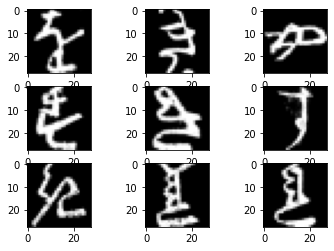

In [6]:
#แสดงภาพตตัวอย่าง 9 ภาพ
import matplotlib.pyplot as plt


for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))

plt.savefig('picture.jpeg', dpi=300)

In [7]:
#ขยายมิติ Dataset 
#print(train_data.shape, test_data.shape)

train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))

print(train_data.shape, test_data.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [9]:
from keras.utils.np_utils import to_categorical

y = to_categorical(y)
y_test = to_categorical(y_test)

print(y.shape, y_test.shape)
y[:10]

(60000, 10) (10000, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, y, 
                                                    test_size=0.2,
                                                    random_state=99)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
# 		rotation_range=20,
# 		zoom_range=0.15,
# 		width_shift_range=0.2,
# 		height_shift_range=0.2,
# 		shear_range=0.15,
# 		horizontal_flip=True)

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

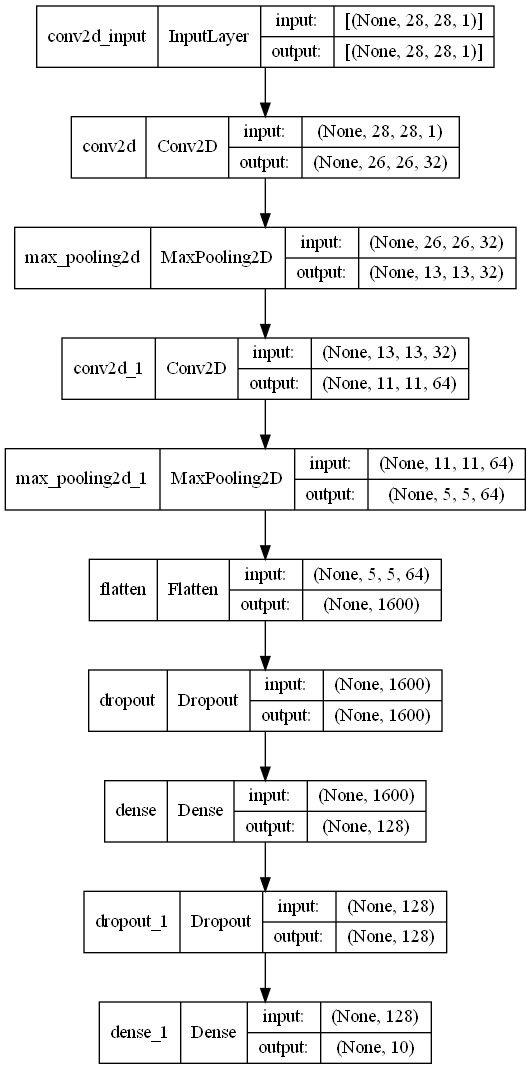

In [13]:
# pip install graphviz
# conda install -c conda-forge pydotplus

from tensorflow.keras.utils import plot_model

plot_model(model, 'digit.png', show_shapes=True, show_layer_names=True)

In [14]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=15, 
                    batch_size=128, verbose=1, 
                    validation_data=(X_test, y_test), shuffle=True)

Epoch 1/15
375/375 [==============================] - 21s 54ms/step - loss: 0.6951 - accuracy: 0.7789 - val_loss: 0.2304 - val_accuracy: 0.9302
Epoch 2/15
375/375 [==============================] - 23s 61ms/step - loss: 0.3117 - accuracy: 0.9050 - val_loss: 0.1480 - val_accuracy: 0.9557
Epoch 3/15
375/375 [==============================] - 23s 61ms/step - loss: 0.2361 - accuracy: 0.9282 - val_loss: 0.1196 - val_accuracy: 0.9646
Epoch 4/15
375/375 [==============================] - 23s 61ms/step - loss: 0.1989 - accuracy: 0.9390 - val_loss: 0.0975 - val_accuracy: 0.9722
Epoch 5/15
375/375 [==============================] - 23s 62ms/step - loss: 0.1734 - accuracy: 0.9462 - val_loss: 0.0858 - val_accuracy: 0.9766
Epoch 6/15
375/375 [==============================] - 23s 62ms/step - loss: 0.1593 - accuracy: 0.9519 - val_loss: 0.0793 - val_accuracy: 0.9768
Epoch 7/15
375/375 [==============================] - 23s 61ms/step - loss: 0.1477 - accuracy: 0.9529 - val_loss: 0.0747 - val_accuracy:

In [ ]:
# # train the head of the network
# history = model.fit(
# 				datagen.flow(X_train, y_train, batch_size=batch_size),
# 				steps_per_epoch=len(X_train) // batch_size,
# 				validation_data=(X_test, y_test),
# 				validation_steps=len(X_test) // batch_size,
# 				epochs=epochs)

In [16]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: {:.3f}'.format(score[1]))

375/375 [==============================] - 2s 4ms/step - loss: 0.0518 - accuracy: 0.9857
Accuracy: 0.986


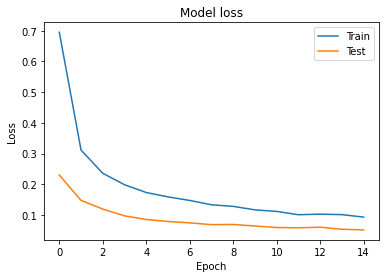

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

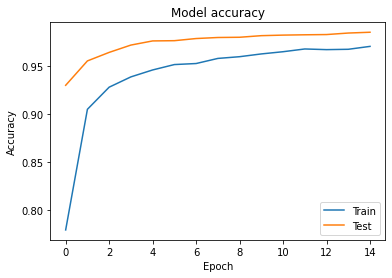

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [19]:
import numpy as np 
import pandas as pd 

y_pred = model.predict(X_test)
y_pred1 = np.argmax(y_pred, axis=1)

y_test = np.argmax(y_test, axis=1)

In [20]:
import collections as cs 
c = cs.Counter(y_test)
c 

Counter({3: 1180,
         7: 1238,
         6: 1227,
         8: 1199,
         2: 1205,
         5: 1207,
         0: 1158,
         9: 1139,
         1: 1206,
         4: 1241})

In [21]:
#  class_names = ["T-shirt/top", "Trouser", "Pullover", 
#                "Dress", "Coat","Sandal", "Shirt", "Sneaker",
#                "Bag", "Ankle boot"]
#  class_names

Accuracy Score: 0.99
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1158
           1       0.99      0.99      0.99      1206
           2       0.99      0.97      0.98      1205
           3       0.99      0.99      0.99      1180
           4       0.99      0.98      0.98      1241
           5       0.99      0.98      0.99      1207
           6       0.97      0.99      0.98      1227
           7       0.98      0.99      0.99      1238
           8       0.98      0.99      0.99      1199
           9       0.99      0.99      0.99      1139

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

[[1139    0    0    0    1    2    2   10    3    1]
 [   1 1189    1    0    3    2    6    2    0    2]
 [   0    4 1167    5    4    4   13    2    2    4]
 [   0    0    1 1172    0    2    0    2    3    0]
 [   6  

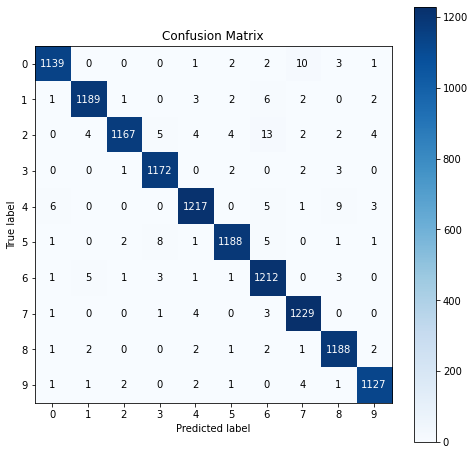

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred1)))
print(classification_report(y_test, y_pred1)) #, target_names=class_names, digits=4))
cm = confusion_matrix(y_test, y_pred1)
print(cm)

#pip install scikit-plot
import scikitplot as skplot 
plt.rcParams['figure.figsize'] = 8,8
skplot.metrics.plot_confusion_matrix(y_test, y_pred1)
plt.show()

In [ ]:
# model.save('num_model.h5')
# model.save('num_model')

In [ ]:
# #my_model.get_config()
# from tensorflow.keras.models import load_model
# datamodel = load_model('tfdsmodel.h5')

# datamodel.summary()

In [ ]:
# history = datamodel.fit(X_train, y_train, 
#                     epochs=50, batch_size=10, 
#                     verbose=1, validation_split=0.25,
#                     shuffle=True) #validation_data=(X_test,y_test)